## Color Histograms
### Traditionally, many technologies relied on manually appending metadata to images and searching via this metadata. This approach works for datasets with high-quality annotation, but most datasets are too large for manual annotation.

### That means any large image dataset must rely on Content-Based Image Retrieval (CBIR). Search with CBIR focuses on comparing the content of an image rather than its metadata. Content can be color, shapes, textures – or with some of the latest advances in ML - the "human meaning" behind an image.

### Color histograms represent one of the first CBIR techniques, allowing us to search through images based on their color profiles rather than metadata.
### - When we build and search with our color histograms we are going to convert them into a single image embedding vector. 

### core idea of color histograms. Take an image, translate it into color-based histograms, and use these histograms to retrieve images with similar color profiles.

In [5]:
from datasets import load_dataset

data = load_dataset('pinecone/image-set', split='train', revision='e7d39fc') # small 21 image dataset
data

Dataset({
    features: ['image_bytes', 'image'],
    num_rows: 21
})

### - image_bytes is a base64 encoded representation of our image bytes. When the images are downloaded they need to be decoded. 

In [6]:
from base64 import b64decode
import cv2
import numpy as np

def process_fn(sample):
    image_bytes = b64decode(sample['image_bytes'])
    image = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)
    return image

images = [process_fn(sample) for sample in data]

### - OpenCV loads images in a (BGR) format. Matplotlib expected RGB, so we must flip the color channels of the array to get the true color image.

In [ ]:
shape = images[0].shape
shape, images[0][0, 0, :]

import numpy as np

rgb_image = np.flip(images[0], 2)

shape = rgb_image.shape         # Height, Width, color channels 
shape, rgb_image[0, 0, :]       # channel values 


((1600, 2560, 3), array([134, 174, 165], dtype=uint8))

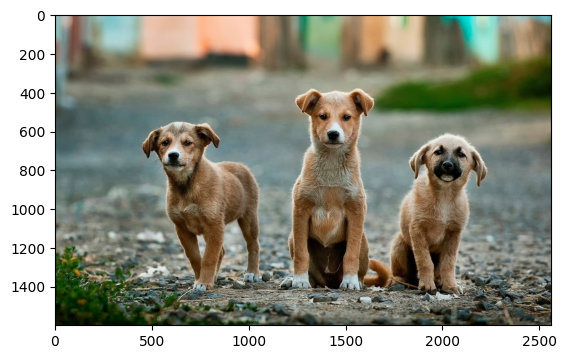

In [13]:
import matplotlib.pyplot as plt

plt.imshow(rgb_image)

### - The color channel values for all pixels in the image are presently stored in an array of equal dimensions to the original image. When comparing image embeddings the most efficient techniques rely on comparing vectors not arrays. To handle this, we reshape the rows and columns of the image array into a single row (vector).

In [ ]:
image_vector = rgb_image.reshape(1, -1, 3)
image_vector.shape      # All of the rows concatenated together 

(1, 4096000, 3)

### - Still technically an array because of the three color channels. Need to extract those out to make three vectors for each color. 

In [16]:
red = image_vector[0, :, 0]
green = image_vector[0, :, 1]
blue = image_vector[0, :, 2]

red.shape, green.shape, blue.shape

((4096000,), (4096000,), (4096000,))

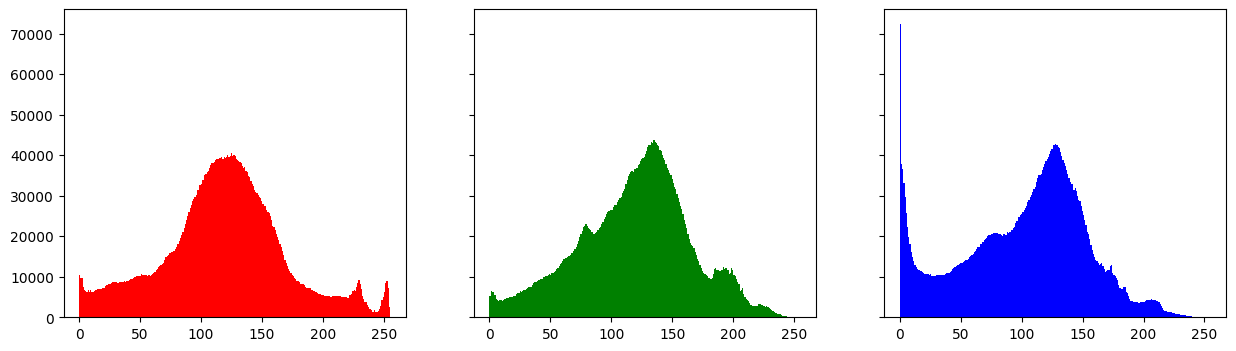

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axs[0].hist(red, bins=256, color='r')
axs[1].hist(green, bins=256, color='g')
axs[2].hist(blue, bins=256, color='b')
plt.show()  # Displays the RGB color profile
# Left off at 13:10